<a href="https://colab.research.google.com/github/djswoosh/Uni-Bits/blob/main/Sentiment_Analysis_on_Amazon_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import Libraries

import numpy as np #for working with arrays
import matplotlib.pyplot as plt #forvisualizations
import pandas as pd #for data manipualtion and analysis
import io as io #  provides Python’s main facilities for dealing with various types of I/O.
import json #syntax for storing and sharing data in javascript
import re # For regular expressions
import string # For handling string
import math # For performing mathematical operations

In [30]:
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('/content/drive/MyDrive/DATA SCIENCE/Datasets/Video_Games_5.json.gz')


In [31]:
df.head()

overall  verified   reviewTime  ... vote style image
0      5.0      True  10 17, 2015  ...  NaN   NaN   NaN
1      4.0     False  07 27, 2015  ...  NaN   NaN   NaN
2      3.0      True  02 23, 2015  ...  NaN   NaN   NaN
3      2.0      True  02 20, 2015  ...  NaN   NaN   NaN
4      5.0      True  12 25, 2014  ...  NaN   NaN   NaN

[5 rows x 12 columns]

In [32]:
print("Shape of data=>",df.shape) #SourceCodeLink https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

Shape of data=> (497577, 12)


In [33]:
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image'],
      dtype='object')

In [34]:
df['asin'].value_counts() #Shows Which Products have the most reviews, and which ones have the least

B00178630A    1381
B000ZK9QCS     905
B000XJNTNS     834
B00JK00S0S     783
B000ZKA0J6     774
              ... 
B0017WKITS       1
B0011W8DNW       1
B0017YHYFM       1
B000XJD33E       1
B000WMJM3W       1
Name: asin, Length: 17408, dtype: int64

In [35]:
#Pick the columns I want to keep


df=df[['overall','asin','reviewText','summary']]
print("Shape of data=>",df.shape)
df.head(5)

Shape of data=> (497577, 4)


overall  ...                                      summary
0      5.0  ...                  but when you do it's great.
1      4.0  ...  But in spite of that it was fun, I liked it
2      3.0  ...                                  Three Stars
3      2.0  ...                                    Two Stars
4      5.0  ...                               love this game

[5 rows x 4 columns]

In [36]:
df.isnull().sum()

overall         0
asin            0
reviewText    158
summary       109
dtype: int64

In [37]:

#DropsNullValues
df.dropna(inplace=True)
df.isnull().sum()

overall       0
asin          0
reviewText    0
summary       0
dtype: int64

In [38]:

df=df.groupby('asin').filter(lambda x:len(x)>500).reset_index(drop=True)
print('Number of products=>',len(df['asin'].unique()))

Number of products=> 29


In [39]:
#Cleaning Text Data in Python
df['reviewText'].unique()

array(['Hmm the connection.... lets just say its a good idea to have a friend in the Video game Store business especially when that person can tell you the date and time shipments come in,  but this is a great system, I have many plans for it, sometimes its just best to be patient and let opportunities like this come to YOU!',
       'I love the wii. The best games are Wii Sports Red Steel Trauma Center and zelda+excite truck. Futeure good games SSX Blur Metroid, Super mario Galaxy, Smash Bros Brawl, Wario Ware. The best VIRTUAL CONSOLE GAMES are Super Mario(all) and sonic.(forgot others) Best wii sport game(s) tennis and boxing #2Bowling or Baseball #3 Golf. All and all buy wii.',
       'For [...], it is the best buy out there. You are not going to be disappointed. If you were an Avid PS2 or Xbox player, and your picky about graphics ,frame rate and how realistic it looks when something  blows up...then you might want to consider the Wii as a second system.\nI own 19 games for the Wi

In [40]:
for index,text in enumerate(df['reviewText'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 WAY TO EXPENSIVE!!!!!!!!!!!!
Review 2:
 Mine didn't come with a controller, so sadly I wasn't able to use it immediately as I had planned around. The product description didn't seem to mention this, which sucks.
Review 3:
 Came early and worked perfectly..
Review 4:
 Works perfectly, came as described, and even had a couple of games downloaded on it.
Review 5:
 I brought this product used and I like it a lot. I hacked it using the letterbomb method and now I've got Homebrew. I can make this thing play dvd's, mp3's, certain indie games and so on. It's wonderful. :)


In [ ]:
#TO clean the text data we perform the following operations
#Expand contractions
#Lowercase the reviews
#Remove digits and words containing digits
#Remove punctuations


In [14]:
#Expand Contractions

# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['reviewText']=df['reviewText'].apply(lambda x:expand_contractions(x))

In [41]:
#LowerCaseTheReviews

df['cleaned']=df['reviewText'].apply(lambda x: x.lower())

In [42]:
#Remove digits and words containing digits

df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [43]:
#Remove Punctuation

df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [44]:

# Removing extra spaces
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [45]:
for index,text in enumerate(df['cleaned'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 way to expensive
Review 2:
 mine didnt come with a controller so sadly i wasnt able to use it immediately as i had planned around the product description didnt seem to mention this which sucks
Review 3:
 came early and worked perfectly
Review 4:
 works perfectly came as described and even had a couple of games downloaded on it
Review 5:
 i brought this product used and i like it a lot i hacked it using the letterbomb method and now ive got homebrew i can make this thing play dvds s certain indie games and so on its wonderful 


Preparing Text Data for Exploratory Data Analysis (EDA)

In [ ]:
#Following Steps

#Stopwords Removal
#Lemmatization
#Create Document Term Matrix

In [46]:
# Importing spacy
import spacy #library for advanced Natural Language Processing in Python and Cython.

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [52]:
df_grouped=df[['asin','lemmatized']].groupby(by='asin').agg(lambda x:' '.join(x))
df_grouped.head()

lemmatized
asin                                                         
B0009VXBAQ  hmm connection let good idea friend video game...
B000B9RI14  buy ms point xbox credit card number not probl...
B000P46NMA  game work love series game great game perfect ...
B000P46NMK  have see game life detail citys feel like live...
B000VJRU44  nintendo come wii year ago give gamer new appr...

In [53]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

aa  aaa  aaaa  aaaall  aaall  ...  zulton  zurg  zygna  zynga  zzzzzz
asin                                      ...                                    
B0009VXBAQ   6    3     0       0      0  ...       0     0      0      0       0
B000B9RI14   0    0     0       0      0  ...       0     0      0      0       0
B000P46NMA   0    1     0       0      0  ...       0     0      0      0       0

[3 rows x 26542 columns]

Exploratory Data Analysis on Amazon Product Reviews using Python

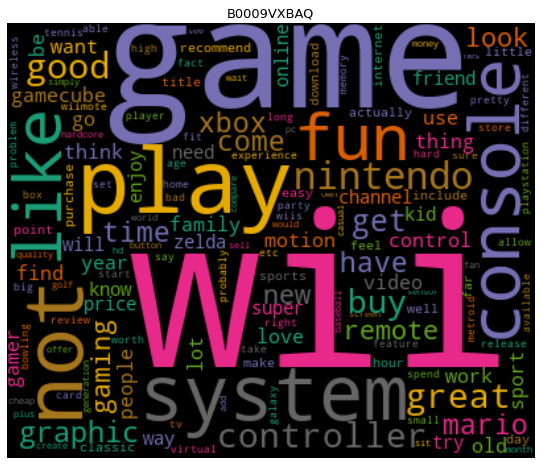

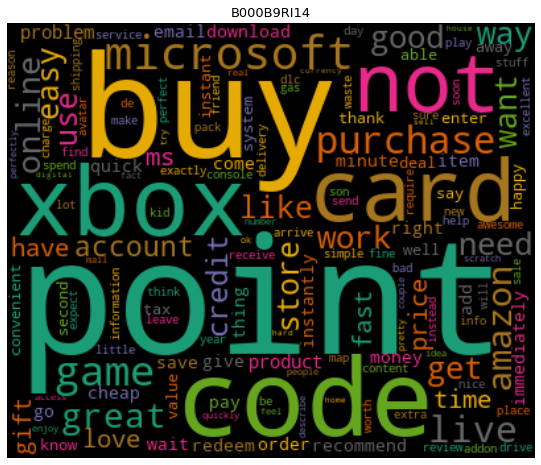

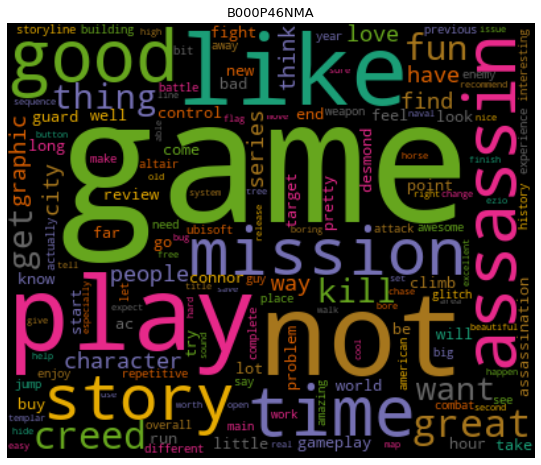

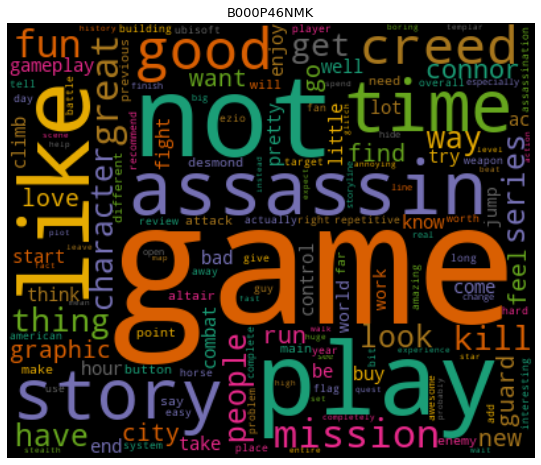

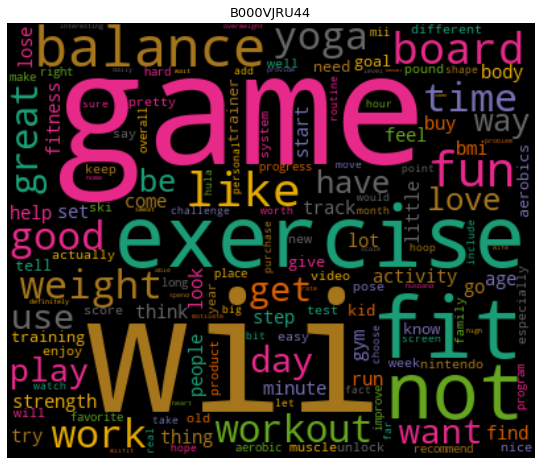

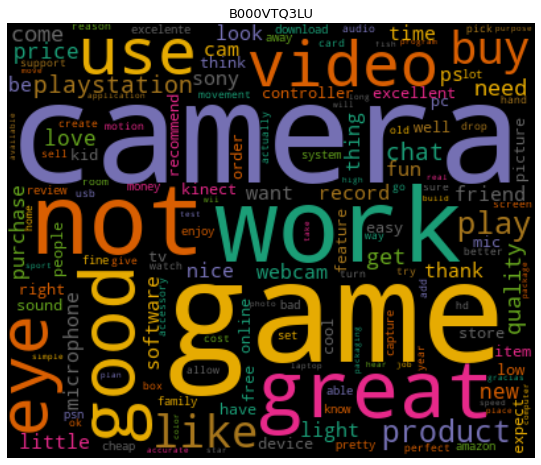

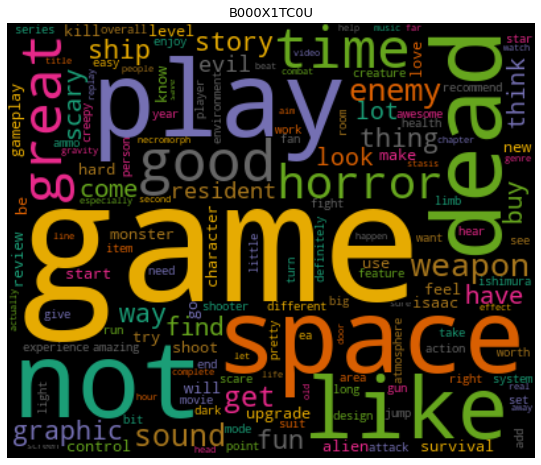

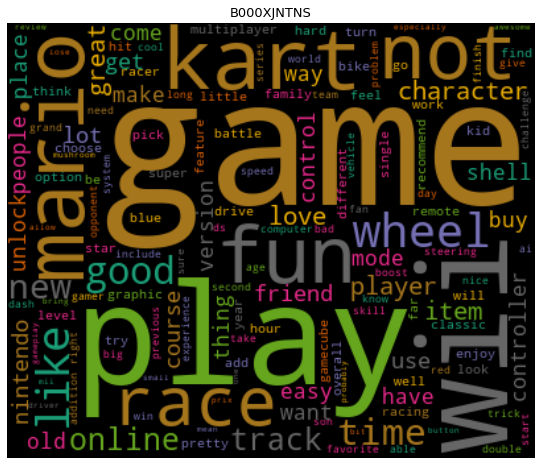

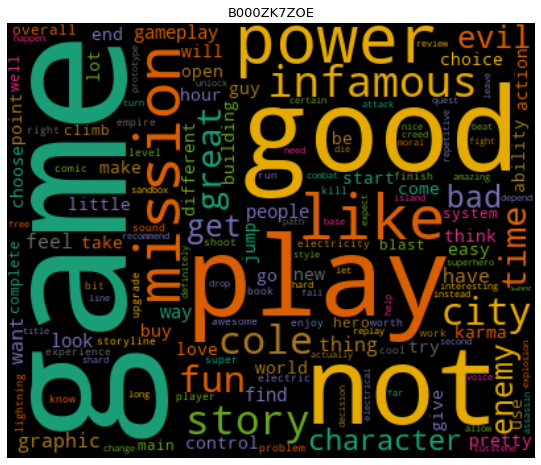

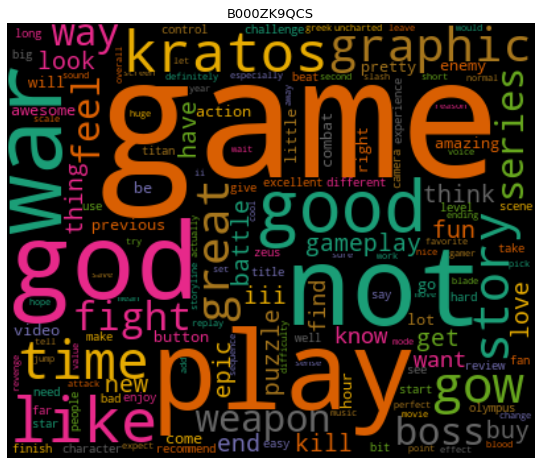

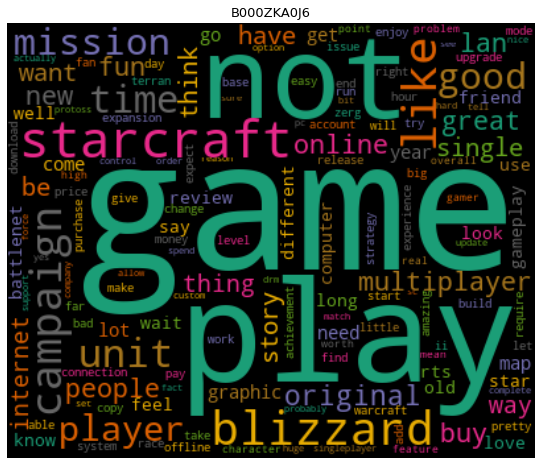

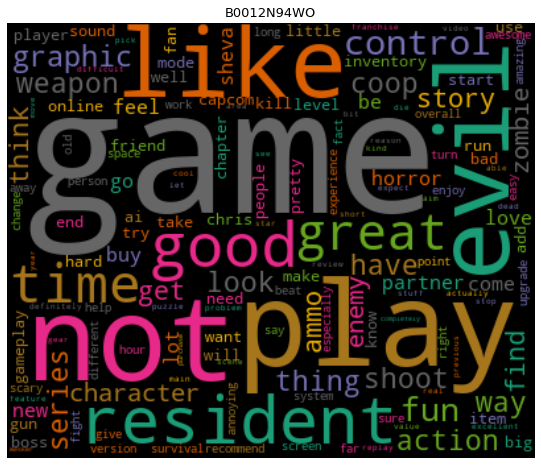

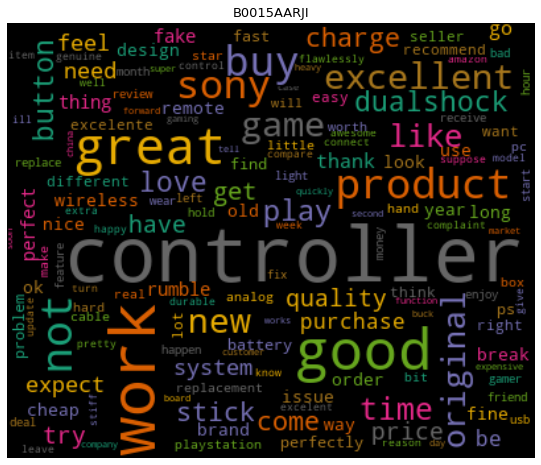

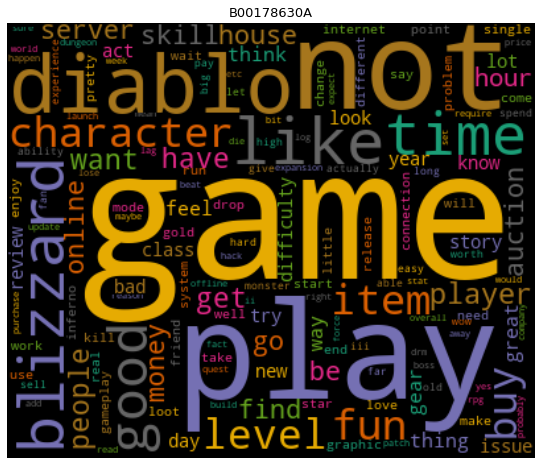

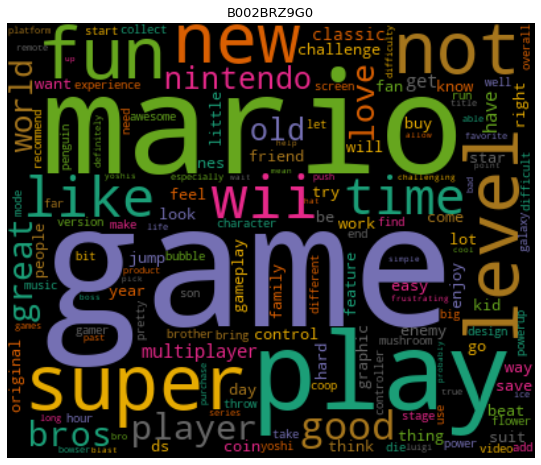

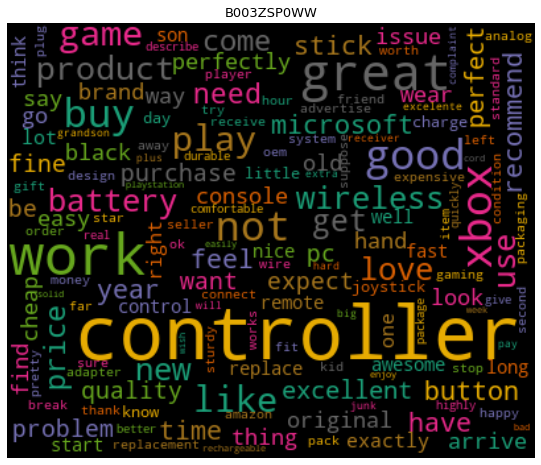

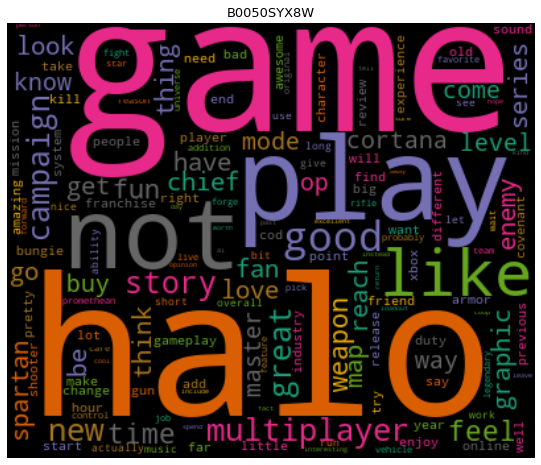

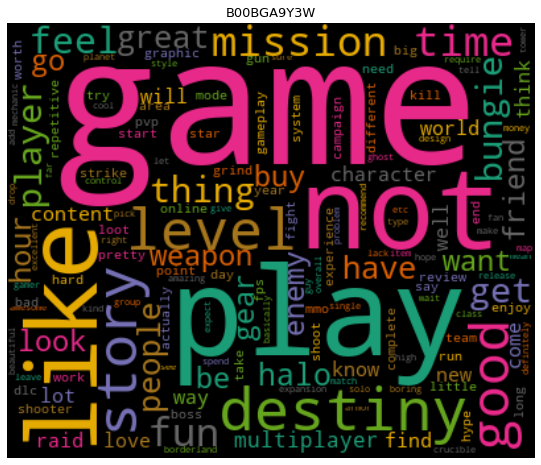

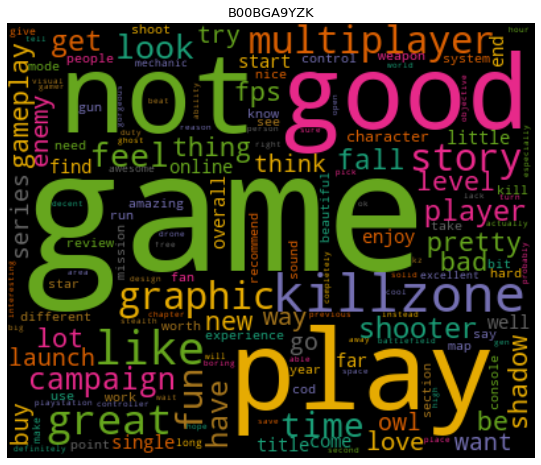

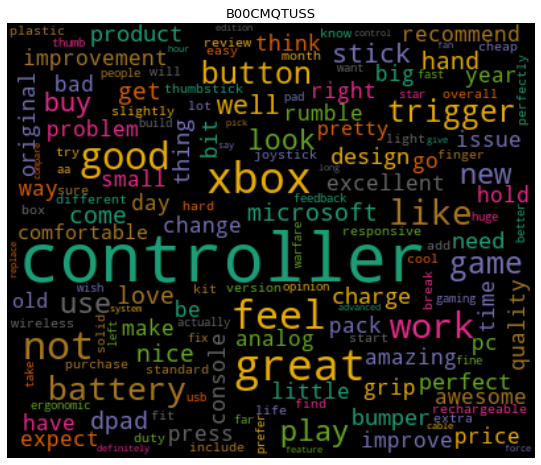

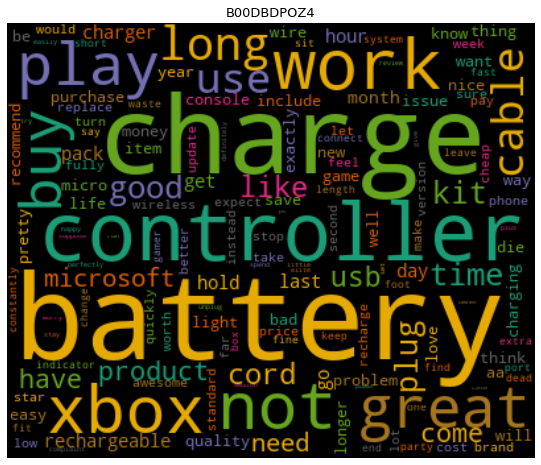

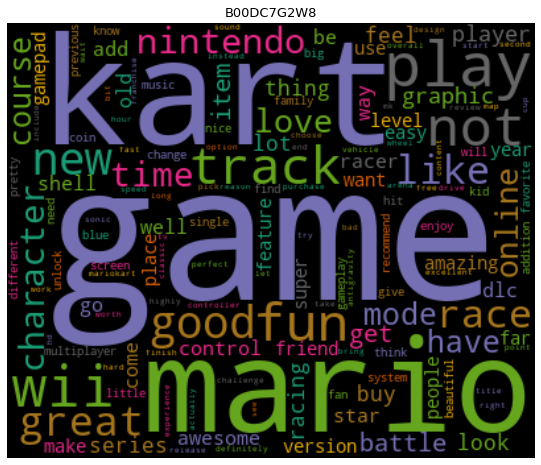

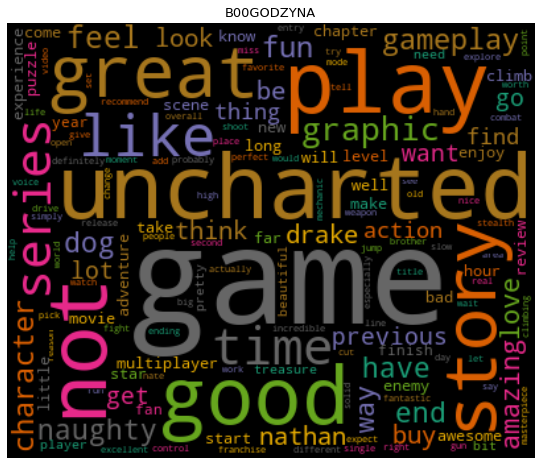

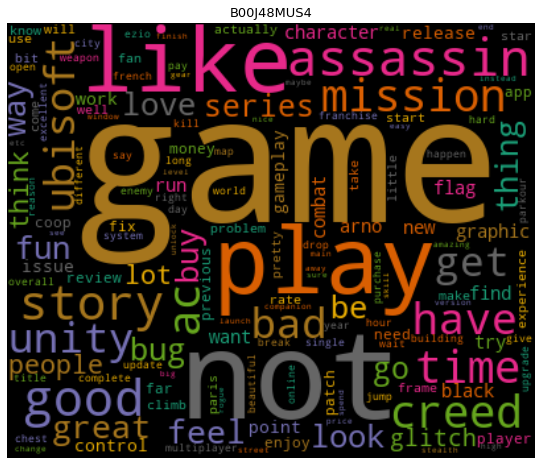

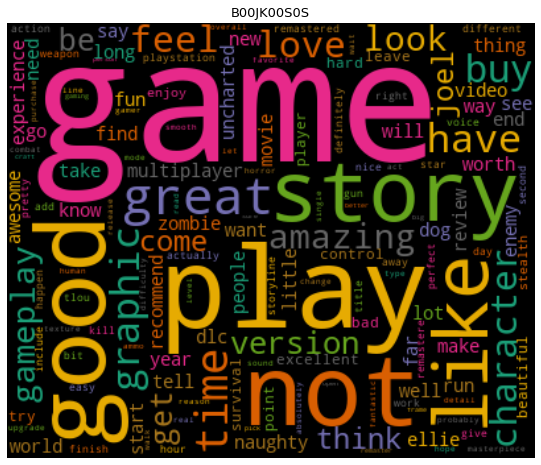

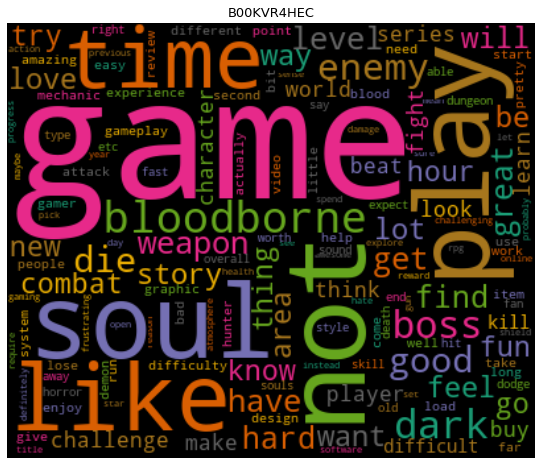

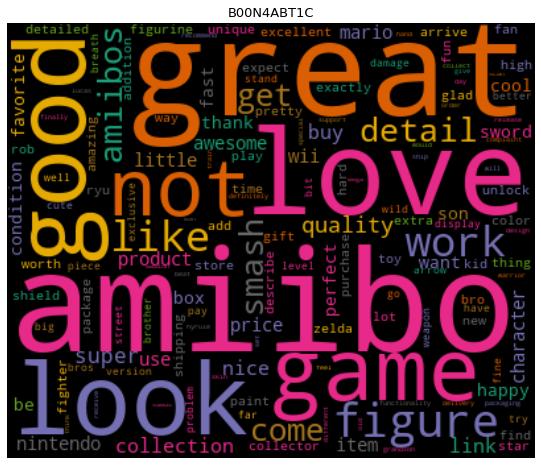

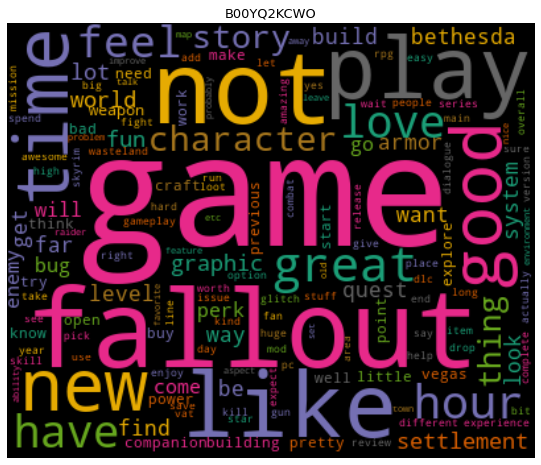

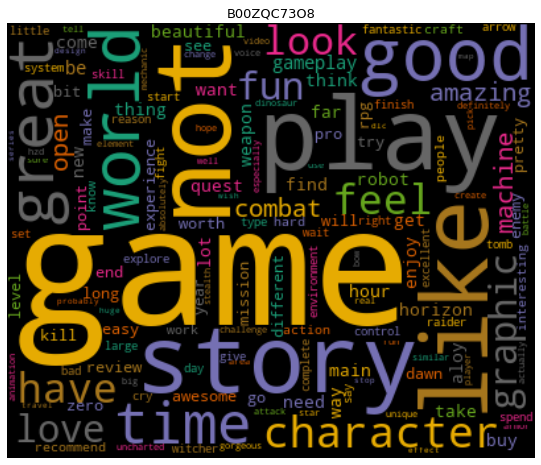

In [54]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

In [55]:
from textblob import TextBlob
df['polarity']=df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [56]:
print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['reviewText']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:
 Perfect!
Review 2:
 Excellent Controller
Review 3:
 Perfect no problem at all!


In [57]:
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['reviewText']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 Service was horrible.
Review 2:
 Ac series getting boring.
Review 3:
 One Word Review :BORING


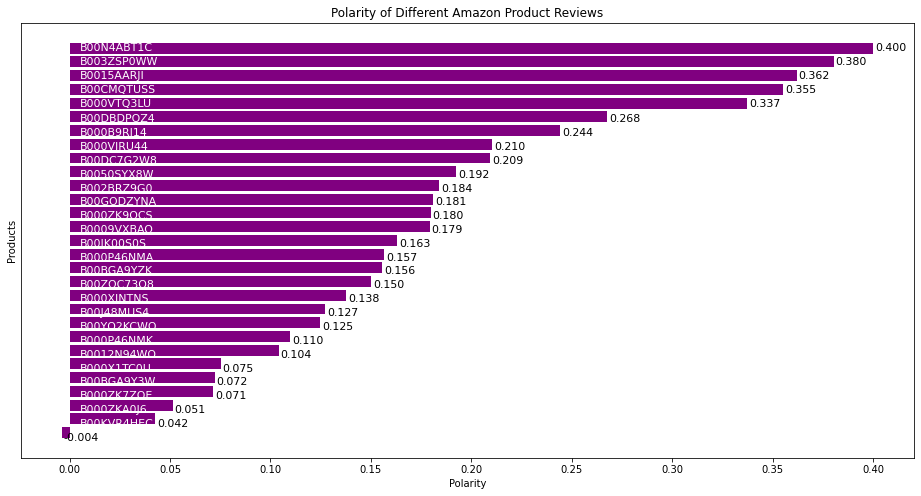

In [58]:
product_polarity_sorted=pd.DataFrame(df.groupby('asin')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different Amazon Product Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

The Top Top 5 product codes, are the ones with the most negative reviews, and would need to be improved by Amazon for better results

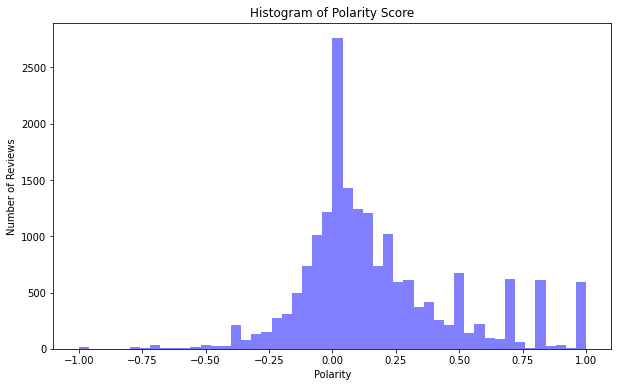

In [59]:
#Histogram of Polarity Scores
import seaborn as sns
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

In [81]:
#Adding more features to the DataSet, Length of the Review and WordCount
df['review_len'] = df['lemmatized'].astype(str).apply(len)
df['word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd64701eb50>,
      dtype=object)

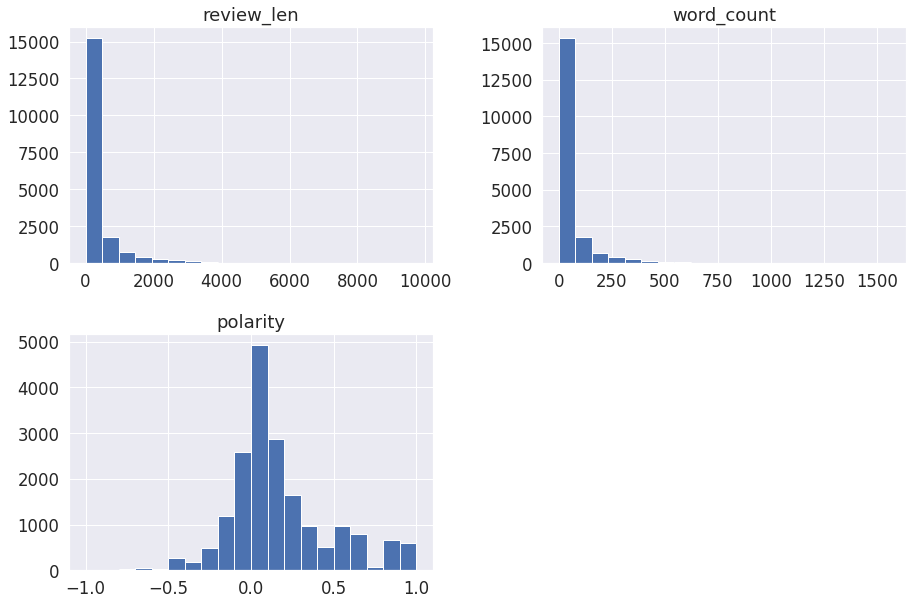

In [82]:
#Distribution by Length of the Review, WordCount and Polarity

df[["review_len", "word_count", "polarity"]].hist(bins=20, figsize=(15, 10))

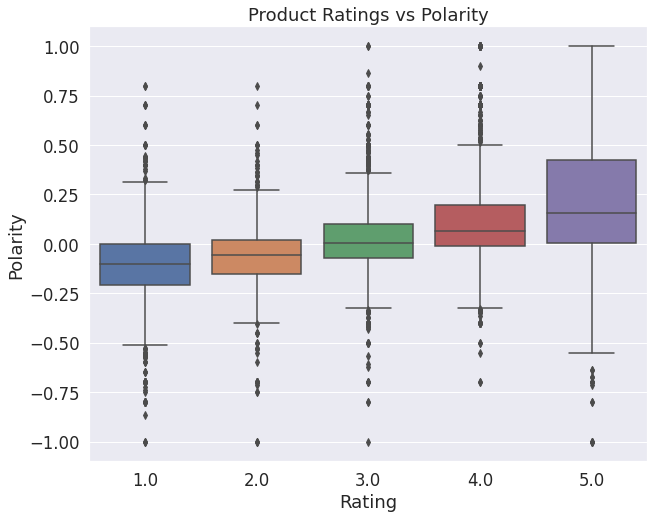

In [83]:
#Polarity versus Overall Rating

plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
sns.boxplot(x = 'overall', y = 'polarity', data = df)
plt.xlabel("Rating")
plt.ylabel("Polarity")
plt.title("Product Ratings vs Polarity")
plt.show()

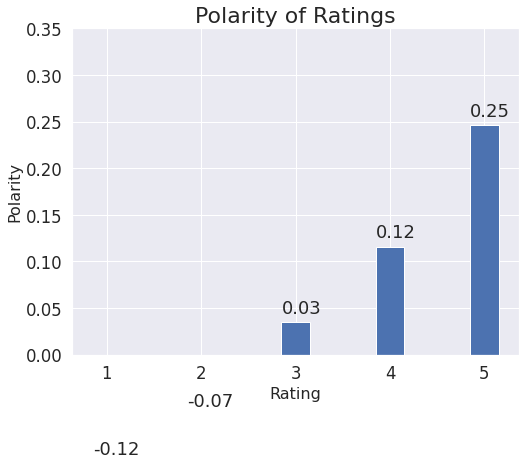

In [84]:
mean_pol = df.groupby('overall')['polarity'].agg([np.mean])
mean_pol.columns = ['mean_polarity']
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(mean_pol.index, mean_pol.mean_polarity, width=0.3)
#plt.gca().set_xticklabels(mean_pol.index, fontdict={'size': 14})
    
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+0.01, str("{:.2f}".format(i.get_height())))
plt.title("Polarity of Ratings", fontsize=22)
plt.ylabel("Polarity", fontsize=16)
plt.xlabel("Rating", fontsize=16)
plt.ylim(0, 0.35)
plt.show()

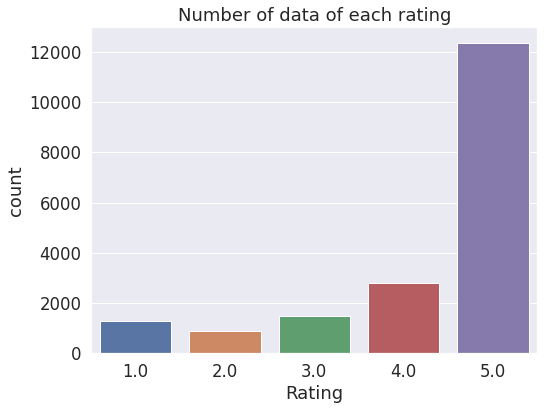

In [85]:
plt.figure(figsize=(8, 6))
sns.countplot(x='overall', data=df)
plt.xlabel("Rating")
plt.title("Number of data of each rating")
plt.show()

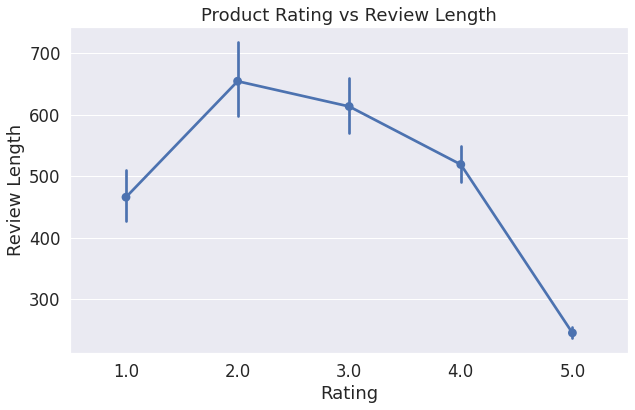

In [86]:
plt.figure(figsize=(10, 6))
sns.pointplot(x = "overall", y = "review_len", data = df)
plt.xlabel("Rating")
plt.ylabel("Review Length")
plt.title("Product Rating vs Review Length")
plt.show()


When the Rating is higher to 5 it seems customers don't write too much, and that is reflected by the overall happiness with the product.

In [87]:
#Top 20 Products Based by Polarity

product_pol = df.groupby('asin')['polarity'].agg([np.mean])
product_pol.columns = ['polarity']
product_pol = product_pol.sort_values('polarity', ascending=False)
product_pol = product_pol.head(20)
product_pol

polarity
asin                
B00N4ABT1C  0.400127
B003ZSP0WW  0.380363
B0015AARJI  0.361929
B00CMQTUSS  0.355263
B000VTQ3LU  0.337110
B00DBDPOZ4  0.267513
B000B9RI14  0.244016
B000VJRU44  0.210204
B00DC7G2W8  0.209413
B0050SYX8W  0.192293
B002BRZ9G0  0.184111
B00GODZYNA  0.181133
B000ZK9QCS  0.179769
B0009VXBAQ  0.179265
B00JK00S0S  0.163080
B000P46NMA  0.156558
B00BGA9YZK  0.155679
B00ZQC73O8  0.150073
B000XJNTNS  0.137657
B00J48MUS4  0.127371

In [88]:
#Creating a Single WordCloud for all of the Reviews

text = " ".join(lemmatized for lemmatized in df.lemmatized)


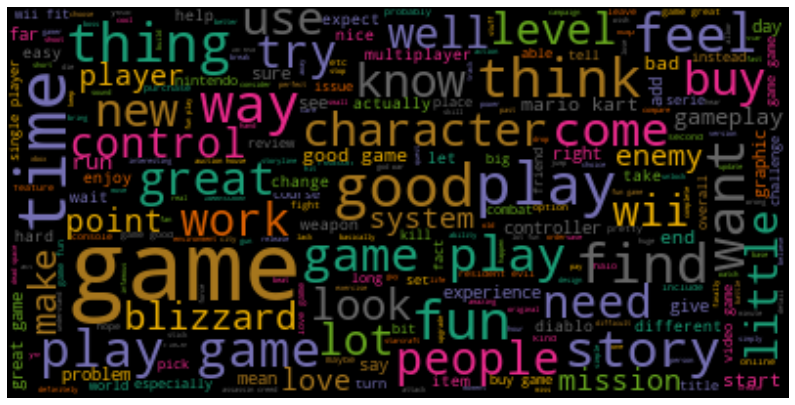

In [89]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl"])

wordcl = WordCloud(stopwords = stopwords, max_font_size = 50, max_words = 5000, colormap="Dark2").generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()




In [90]:
#Frequency Chart of the most commonly used words in reviews
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['lemmatized'], 20)
df1 = pd.DataFrame(common_words, columns = ['lemmatized', 'count'])
df1.head()

lemmatized  count
0       game  49482
1       play  18106
2        not  17120
3       like  11506
4       good  10474

In [78]:
df.head()

overall        asin  ... review_len word_count
0      5.0  B0009VXBAQ  ...        318         61
1      5.0  B0009VXBAQ  ...        351         59
2      5.0  B0009VXBAQ  ...       2187        398
3      5.0  B0009VXBAQ  ...         35          5
4      5.0  B0009VXBAQ  ...         96         19

[5 rows x 9 columns]

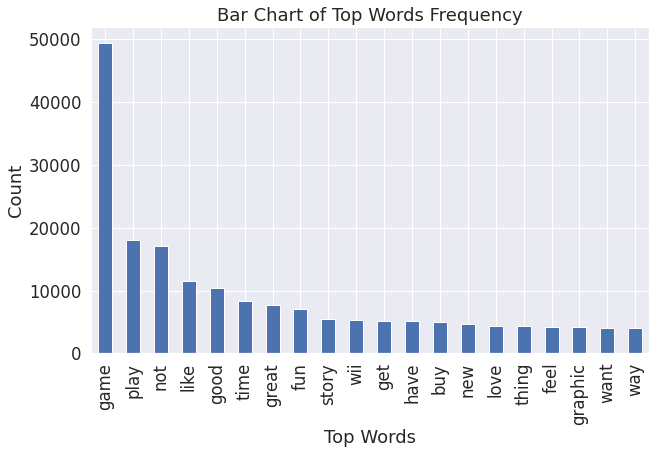

In [91]:
df1.groupby('lemmatized').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

In [92]:
#Seeing More than a Single Word Together can provide more information

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(df['lemmatized'], 30)
df2 = pd.DataFrame(common_words2, columns=['lemmatized', "Count"])
df2.head()

lemmatized  Count
0   play game   2392
1   game play   1930
2   good game   1473
3  mario kart   1425
4   feel like   1382

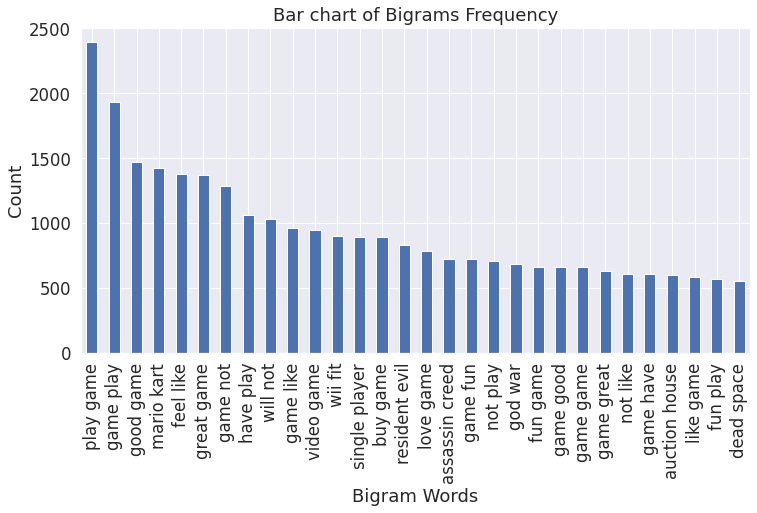

In [93]:
df2.groupby('lemmatized').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency"
)

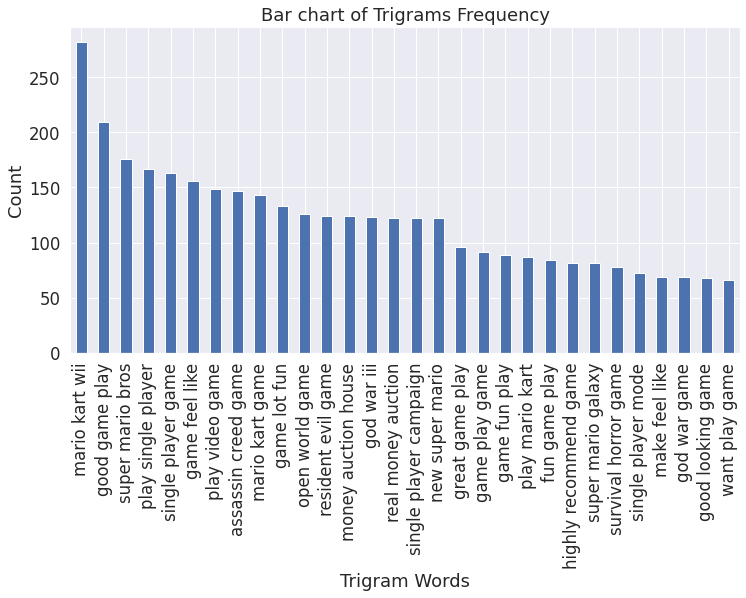

In [94]:
#Trigrams Would help to provide more context to find out what people are saying in the Reviews

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words3 = get_top_n_trigram(df['lemmatized'], 30)
df3 = pd.DataFrame(common_words3, columns = ['lemmatized' , 'Count'])
df3.groupby('lemmatized').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Trigram Words",
    ylabel = "Count",
    title = "Bar chart of Trigrams Frequency"
)